<a href="https://colab.research.google.com/github/esinghbe23-ctrl/Different-Sampling-Techniques/blob/main/Sampling_technique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN

In [2]:
uploaded=files.upload()
data = pd.read_csv("Creditcard_data.csv")
data.head()


Saving Creditcard_data.csv to Creditcard_data.csv


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data['Class'].value_counts()

,count
Class,
0,763
1,9


In [4]:
X = data.drop('Class', axis=1)
y = data['Class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

In [5]:
samplers = {
    "Sampling1": RandomUnderSampler(random_state=42),
    "Sampling2": RandomOverSampler(random_state=42),
    "Sampling3": SMOTE(random_state=42),
    "Sampling4": ADASYN(random_state=42),
    "Sampling5": SMOTEENN(random_state=42)
}

In [6]:
models = {
    "M1": LogisticRegression(max_iter=1000),
    "M2": DecisionTreeClassifier(),
    "M3": RandomForestClassifier(),
    "M4": SVC(),
    "M5": KNeighborsClassifier()
}

In [7]:
results = pd.DataFrame(index=models.keys(), columns=samplers.keys())

for s_name, sampler in samplers.items():
    X_res, y_res = sampler.fit_resample(X_train, y_train)

    for m_name, model in models.items():
        model.fit(X_res, y_res)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        results.loc[m_name, s_name] = round(acc * 100, 2)

In [8]:
results

,Sampling1,Sampling2,Sampling3,Sampling4,Sampling5
M1,69.4,92.24,93.97,93.97,93.97
M2,69.83,97.41,98.71,97.41,98.28
M3,67.24,98.71,99.14,99.14,99.14
M4,83.19,96.55,96.55,96.55,96.12
M5,90.09,96.98,94.83,94.83,93.53


In [9]:
results.mean().sort_values(ascending=True)

,0
Sampling1,75.95
Sampling5,96.208
Sampling2,96.378
Sampling4,96.38
Sampling3,96.64


In [11]:
avg_acc = results.astype(float).mean()
print("Average Accuracy of Sampling Techniques:")
print(avg_acc)

print("\nBest Sampling Technique:")
print(avg_acc.idxmax())

Average Accuracy of Sampling Techniques:
Sampling1    75.950
Sampling2    96.378
Sampling3    96.640
Sampling4    96.380
Sampling5    96.208
dtype: float64

Best Sampling Technique:
Sampling3


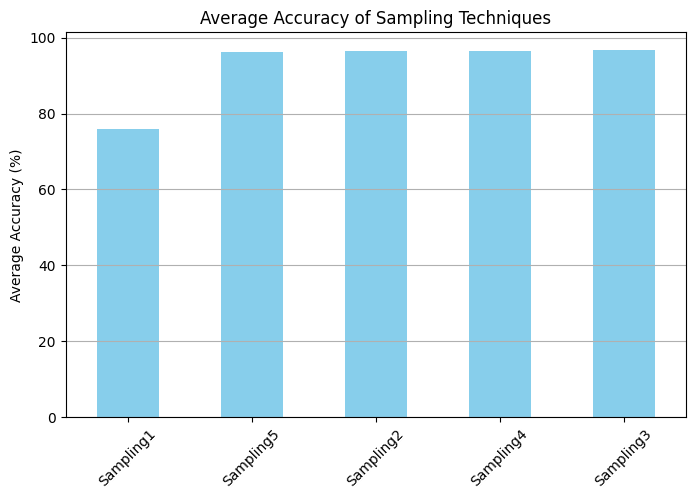

In [13]:
avg_acc = results.mean()

plt.figure(figsize=(8, 5))
avg_acc.sort_values().plot(kind='bar', color='skyblue')
plt.ylabel("Average Accuracy (%)")
plt.title("Average Accuracy of Sampling Techniques")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

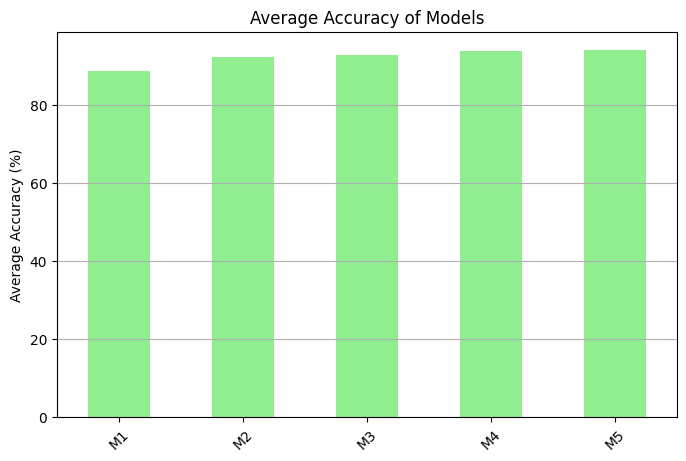

In [14]:
model_avg = results.mean(axis=1)

plt.figure(figsize=(8, 5))
model_avg.sort_values().plot(kind='bar', color='lightgreen')
plt.ylabel("Average Accuracy (%)")
plt.title("Average Accuracy of Models")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

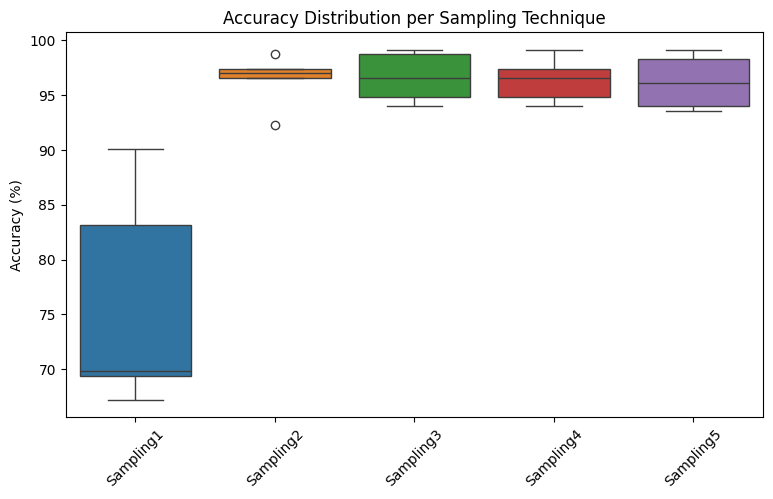

In [15]:
plt.figure(figsize=(9, 5))
sns.boxplot(data=results)
plt.ylabel("Accuracy (%)")
plt.title("Accuracy Distribution per Sampling Technique")
plt.xticks(rotation=45)
plt.show()


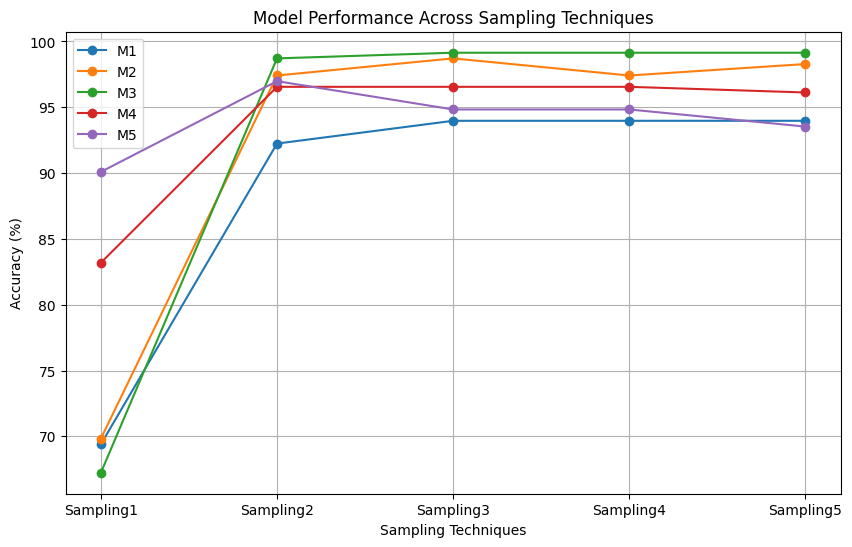

In [16]:
plt.figure(figsize=(10, 6))

for model in results.index:
    plt.plot(results.columns, results.loc[model], marker='o', label=model)

plt.xlabel("Sampling Techniques")
plt.ylabel("Accuracy (%)")
plt.title("Model Performance Across Sampling Techniques")
plt.legend()
plt.grid(True)
plt.show()

In [17]:
best_model, best_sampler = results.stack().idxmax()
best_score = results.loc[best_model, best_sampler]

print(f"Best Combination: {best_model} + {best_sampler}")
print(f"Accuracy: {best_score:.2f}%")

Best Combination: M3 + Sampling3
Accuracy: 99.14%
